# Unsupervised Learning - Exercise

```In this exercise you will experience with K-Means, and PCA, and will do some use of them for handling practical problems.```

~```Gilad Royz```

# Part 1 - Clustering

```In this question you are asked to examine the 2 clustering algorithms: KMeans and DBscan.```

```You will have to generate manipulative datasets, and demonstrate the weaknesses of each method. That is, for each one of the clustering methods, generate a dataset such that one of the methods will fail, and the others will not.
Deal with the model's hyper parameters, and conclude for yourself how sensitive they are.```

```For each dataset draw your results using your favorite visualization tool.```

In [ ]:
#DBSCAN - ignore 'outlines', sensitive to neibor's parameter

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))

### dataset for example
data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2)),\
                       np.random.random((1000,2)) + np.array([1.8,0.2])])

clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
y_kmeans = clf_kmeans.fit_predict(data)

clf_dbscan = DBSCAN(eps = 0.3, min_samples = 10, n_jobs = -1)
y_dbscan = clf_dbscan.fit_predict(data)

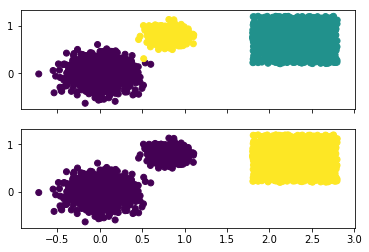

In [2]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

In [8]:
X, y = make_moons(20000, noise=0.1, random_state=0)
high_additional_points = np.random.randint(1.5,4 , size=(1000,2))
my_data = np.concatenate([X,high_additional_points])

In [9]:
%%time
labels = KMeans(2, random_state=42 , max_iter=100).fit_predict(my_data)

Wall time: 275 ms


Text(0.5,1,'KMeans')

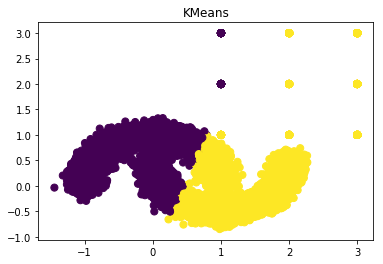

In [10]:
plt.scatter(my_data[:, 0], my_data[:, 1], c=labels,s=50, cmap='viridis');
plt.title('KMeans')

In [11]:
%%time
labels = DBSCAN(eps = 0.5, min_samples = 50, n_jobs = -1).fit_predict(my_data)

Wall time: 5.11 s


Text(0.5,1,'DBSCAN')

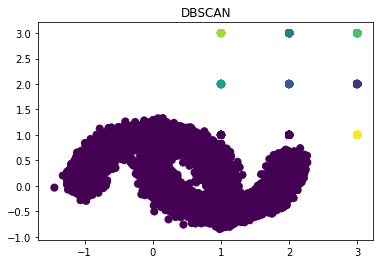

In [12]:
plt.scatter(my_data[:, 0], my_data[:, 1], c=labels,s=50, cmap='viridis');
plt.title('DBSCAN')

In [ ]:
#conclustion:
#1. the most sensetive hyper parters are : for KMeans - n_clusters and max_iter , for DBSCAN - eps and min_samples
#2. it seems like DBSCAN is faster than KMeans
#3. there isn't "right" way to do cluster, that why its hard to tell which of them did better for predictions
#4. DBSCAN is based by distances -  if there is some point which is out of the radius it doesnt belong it to an existing group, in contaray to KMeans. (you can see it in the figures above)
#5. DBSCAN does not require one to specify the number of clusters

```Answer the following questions based on what you learned from the previous question:```
- ```Which method is easiest to use?->>>>>>>>>>>>>>>>they both are easy to use, but it think that DBSCAN is more ituative and no number of clusters needed```
- ```Which method is the fastest to use?->>>>>>>>>>>>in my example DBSCAN was faster , but in real world data K-means is often nuch faster```

```We will now use K-Meansto quantize image colors:```

```First load the given celebrity image from the image folder (can be found in:```
https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('images/images/Alicia Vikander/1.jpg')[:,:,::-1]
img_array = np.array(img)

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_array)

```Every pixel in the image is composed of three colors (Red, Green, Blue), and therefore, every pixel is a vector: (r,g,b).```
```Create a list of every color pixel in the image: (array.reshape will work)```

In [ ]:
img.shape

In [ ]:
img = img.reshape(-1,1)

```Train a K-Means model with k=10 on the list of colors:```

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
%%time
labels = KMeans(10, random_state=42 , max_iter=100).fit_predict(img)

```Now replace every color vector with the vector of centroid bector of it's cluster.```
```rebuild the image and plot it. How is it compared to the original?```

In [ ]:
predicted_shaped_pixels = labels.reshape(867, 825, 3)

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(predicted_shaped_pixels)

```Train K-Means model with k=2,...,15, and plot the "within-cluster sum-of-squares criterion"```($R_k$)``` for all the k's.```

```(reduce the n_init if it takes too much time)```

(Explain on $R_k$ can be found in: https://scikit-learn.org/stable/modules/clustering.html#k-means)

```Can we conclude "how many clusters" are there, from the graph?```

In [ ]:
#### here we can see the relationship between the sse (Sum of distances of samples to their closest cluster center) and Number of cluster. it looks like somewhere betweee 8-10 is enough for good performances.
#### we cant conclude how many clusters there are, it depands on the sse that we are willing to take.

In [ ]:
sse = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(img)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
sse

In [ ]:
%%time
labels = KMeans(8, random_state=42 , max_iter=100).fit_predict(img)

#### predict with 8 clusters

In [ ]:
predicted_shaped_pixels = labels.reshape(867, 825, 3)
plt.figure(figsize=(6,6))
plt.imshow(predicted_shaped_pixels)

# part 2 - Dimensionality reduction

```The goal of this part is to experience with some basic features of PCA, and have a notion about the capabilities, and uses of this method.```

```We will look on facial images of 3 celebrities, and use PCA to extract facial patterns from images.```
```We then try to use those patterns to build a classifier that can distinguish the 3 celebrities.```

In [ ]:
celebs = ['Alicia Vikander', 'Amy Adams','Andy Serkis']
# images folder in: https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing

In [ ]:
import cv2

In [ ]:
def read_gray_image(path):
    """
    return array with:
    0-axis: height
    1-axis: width
    2-axis: color(rgb)
    """
    return cv2.cvtColor(cv2.imread(path)[:,:,::-1], cv2.COLOR_RGB2GRAY)

```First we load the face images:```

In [ ]:
import os

face_imgs = []
labels = []
for j, c in enumerate(celebs):
    
    dir_path = 'images/images/{}/'.format(c)
    dir_file_paths = [dir_path + i for i in os.listdir(dir_path)]
    
    temp_imgs = [read_gray_image(dir_path + i) for i in os.listdir(dir_path)]
    
    labels += [j]*len(dir_file_paths)
    face_imgs += [read_gray_image(i) for i in dir_file_paths]

```For later steps, we would like to resize all the images to have the same width x height. It is best to choose new shape that least distort the images.```

```Plot the shapes of all the images on the "width", "height" plane: (What does that remind you of?)```

In [ ]:
# the shape of the original images reminds me a square, therefore ill reshape it into a square pattern.

In [ ]:
import skimage
from skimage import data

In [ ]:
for face in face_imgs[:5]:
    print (face.shape)
    plt.figure(figsize=(6,6))
    plt.imshow(face)

In [ ]:
for_reshape_face_imgs = face_imgs.copy()

In [ ]:
for index,face in enumerate(for_reshape_face_imgs):
    for_reshape_face_imgs[index] = skimage.transform.resize(face, (800, 800)) ## square pattern

In [ ]:
#check
for face in for_reshape_face_imgs[:5]:
    plt.figure(figsize=(6,6))
    plt.imshow(face)
    print (face.shape)

```Now on the same plot, draw the point of the "avarage shape". Is it looks like it represents the trend?```

```Resize all the face images to have the "avarage shape." ( cv2.resize will work)```

In [ ]:
for_reshape_AVG_face_imgs = face_imgs.copy()

In [ ]:
sum1 = 0
sum2 = 0
for face in for_reshape_AVG_face_imgs:
    sum1 = sum1 + face.shape[0]
    sum2 = sum2 + face.shape[1]
    
average_hight = int(sum1/len(for_reshape_AVG_face_imgs))
average_width = int(sum2/len(for_reshape_AVG_face_imgs))

for index,face in enumerate(for_reshape_AVG_face_imgs):
    #face_imgs[index] = np.resize(face, (average_hight, average_width))
    for_reshape_AVG_face_imgs[index] = cv2.resize(face, (average_hight, average_width))

#check
for face in for_reshape_AVG_face_imgs[:5]:
    plt.figure(figsize=(6,6))
    plt.imshow(face)
    print (face.shape)

```Flatten all the images into vectors, and split them randomly to train and test groups (with ratio (0.7, 0.3)).```

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
data_for_model =[a.reshape(-1,1) for a in for_reshape_AVG_face_imgs]
data_for_model = [np.array(arr).flatten() for arr in data_for_model] 
#data_for_model = [arr.tolist() for arr in data_for_model]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_for_model, labels, test_size=0.3, random_state=42)

```Now train a PCA model with n_components=10 on the train set. How much variance(in %) the 10 components explain? is it good compared to the dimention of the vectors?```

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train)

In [ ]:
print('explained_variance_ratio:') # the 'best' component explaine 0.23024827% og the varince.
print(pca.explained_variance_ratio_)
print('singular_values:')
print(pca.singular_values_)

In [ ]:
pca.components_.shape

In [ ]:
pca_reshape =[a.reshape(485, 530) for a in pca.components_]

In [ ]:
pca_reshape[0].shape

In [ ]:
pca_reshape[0].shape

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5 , figsize=(20,5) , sharey=True)
ncols=5 
for r in range(2):
    for c in range (5):
            if(r==0):
                ax[r, c].imshow(pca_reshape[(r+c)] , 'gray') #row=0, col=0
            else:
                ax[r, c].imshow(pca_reshape[(ncols+c)] , 'gray')

```Take the 10 component vectors of the model, reshape them to the image shape, and plot all of them:```

It looks something like that:
![image.png](attachment:image.png)

```The "faces" that we got, can roוghly be refered to as the "face patterns" that are the most dominant in the images. can you make sense of the patterns?```

```Notice that if we transform an image to the low dimension and then inverse transform it back, we actually find the "best combination of the patterns" that reconstract out image```

```Now make a PCA model with n_components=10 for the images of every celebrity in the train set (pca_1, pca_2, pca_3). And Then:```

- ```Take all the vectors from the test set.```
- ```Transform them to the low dimension.```
- ```Inverse transform them back to original dimension.```
- ```Compute "mean square error" (MSE) between the original vectors to the reconstructed version of themselves.```
- ```For every vector, mark the PCA model that gave the smallest MSE. (as prediction)```
- ```Print the "confusion matrix" of the prediction.``` (https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train_df = pd.DataFrame(list(zip(X_train,y_train)) , columns=['data' , 'label'])

In [ ]:
train_df.head()

#### split the data by celeb

In [ ]:
train_celeb1 =  train_df[train_df['label']==0].reset_index()
train_celeb2 =  train_df[train_df['label']==1].reset_index()
train_celeb3 =  train_df[train_df['label']==2].reset_index()

#### fit 3 pca's - for each celec 

In [ ]:
pca1 = PCA(n_components=10)
pca1.fit(train_celeb1['data'].tolist())

pca2 = PCA(n_components=10)
pca2.fit(train_celeb2['data'].tolist())

pca3 = PCA(n_components=10)
pca3.fit(train_celeb3['data'].tolist())

In [ ]:
components1 = pca1.transform(X_test)
projected1 = pca1.inverse_transform(components1)

components2 = pca2.transform(X_test)
projected2 = pca2.inverse_transform(components2)

components3 = pca3.transform(X_test)
projected3 = pca3.inverse_transform(components3)

In [ ]:
full_df_test_with_projected = pd.DataFrame(list(zip(X_test,projected1,projected2,projected3)), columns=['original' , 'reverse_pca1' , 'reverse_pca2' , 'reverse_pca3'])
full_df_test_with_projected.head()

In [ ]:
from sklearn.metrics import mean_squared_error

for i in range(3):
    #full_df_test_with_projected.iloc[index]['MSE' + str(i+1) ] = mean_squared_error(face['original'] , face['reverse_pca' + str(i+1)])
    full_df_test_with_projected['MSE' + str(i+1)] = full_df_test_with_projected.apply(lambda x : mean_squared_error(x['original'] , x['reverse_pca' + str(i+1)]) , axis = 1)


In [ ]:
full_df_test_with_projected['MIN_MSE'] = full_df_test_with_projected.apply(lambda x : min(x['MSE1'] , x['MSE2'] , x['MSE3']) , axis = 1)

In [ ]:
full_df_test_with_projected['Predicted_by_min_mse'] = np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE1'] , 0 , (np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE2'] , 1 , 2)))

In [ ]:
full_df_test_with_projected['the best pca with smallest mse'] = np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE1'] ,'pca1' , (np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE2'] , 'pca2' , 'pca3')))

In [ ]:
full_df_test_with_projected.head()

In [ ]:
dd = {}
dd = {1 :full_df_test_with_projected['Predicted_by_min_mse'] }

In [ ]:
y_true = y_test
y_pred = full_df_test_with_projected['Predicted_by_min_mse']

classes=celebs

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])

In [ ]:
cm_df = pd.DataFrame(cm , index=celebs , columns=celebs)

In [ ]:
columns_names = cm_df.columns
for i in range (3):
    cm_df = cm_df.rename(columns={columns_names[i]: columns_names[i]+'_PREDICT'})
    cm_df = cm_df.rename(index={columns_names[i]: columns_names[i]+'_ACTUAL'})

In [ ]:
cm_df

In [ ]:
import seaborn as sns
sns.heatmap(cm_df, annot=True)

```Is it work well? If yes, try to explain why.```

In [ ]:
#it works well with pretty high accuracy,

## Bonus (5 pts)

```Perform the prediction process with PCA models with n_components=[1,10,20,30,40,50,60,70].```

In [ ]:
predictions_by_num_componencts = {}
for conponent_num in [1,10,20,30,40,50,60,70]:
    pca1 = PCA(n_components=conponent_num)
    pca1.fit(train_celeb1['data'].tolist())

    pca2 = PCA(n_components=conponent_num)
    pca2.fit(train_celeb2['data'].tolist())

    pca3 = PCA(n_components=conponent_num)
    pca3.fit(train_celeb3['data'].tolist())
    
    # transforn & inverse :
    
    components1 = pca1.transform(X_test)
    projected1 = pca1.inverse_transform(components1)

    components2 = pca2.transform(X_test)
    projected2 = pca2.inverse_transform(components2)

    components3 = pca3.transform(X_test)
    projected3 = pca3.inverse_transform(components3)
    
    full_df_test_with_projected = []
    full_df_test_with_projected = pd.DataFrame(list(zip(X_test,projected1,projected2,projected3)), columns=['original' , 'reverse_pca1' , 'reverse_pca2' , 'reverse_pca3'])
    
    for i in range(3):
    #full_df_test_with_projected.iloc[index]['MSE' + str(i+1) ] = mean_squared_error(face['original'] , face['reverse_pca' + str(i+1)])
        full_df_test_with_projected['MSE' + str(i+1)] = full_df_test_with_projected.apply(lambda x : mean_squared_error(x['original'] , x['reverse_pca' + str(i+1)]) , axis = 1)
    
    full_df_test_with_projected['MIN_MSE'] = full_df_test_with_projected.apply(lambda x : min(x['MSE1'] , x['MSE2'] , x['MSE3']) , axis = 1)
    full_df_test_with_projected['Predicted_by_min_mse'] = np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE1'] , 0 , (np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE2'] , 1 , 2)))
    full_df_test_with_projected['the best pca with smallest mse'] = np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE1'] ,'pca1' , (np.where(full_df_test_with_projected['MIN_MSE']==full_df_test_with_projected['MSE2'] , 'pca2' , 'pca3')))
    
    predictions_by_num_componencts[conponent_num] = full_df_test_with_projected['Predicted_by_min_mse']

In [ ]:
predictions_by_componencts_df = pd.DataFrame(predictions_by_num_componencts)

In [ ]:
predictions_by_componencts_df['y_true'] = y_test

In [ ]:
predictions_by_componencts_df.head()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_by_num_component = {}
for conponent_num in [1,10,20,30,40,50,60,70]:
    accuracy_by_num_component[conponent_num] = accuracy_score(predictions_by_componencts_df['y_true'], predictions_by_componencts_df[conponent_num])

In [ ]:
accuracy_by_num_component = pd.DataFrame(accuracy_by_num_component , index=accuracy_by_num_component.keys()).head(1)
accuracy_by_num_component = accuracy_by_num_component.T

In [ ]:
sns.lineplot(x=accuracy_by_num_component.index , y =accuracy_by_num_component[1] ,  marker="o")
plt.title('Accuracy by number of components')

```Plot the accuracy of the models. what is the trend of the performance when n_components increases? Is it what you expected? try to explain.```

In [ ]:
#the accuracy improves untill it reaches 40 components, above it the accuracy starts to drop down. i guess it happens because it is too many feacures for this task - the model starts to get confuse or overfit.